In [1]:
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/variables.csv')
df

,Date,S0042FS,LMCADS03,LMCADY,DXY,CPMINDX,LMFUCAVD,LMEXCA,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG,IOEA
0,4/22/2024,4.50,9829.5,9742.00,106.08,50.8,199097.0,-925.0,26830.0,5010.60,102.7800,749.29,82.85,2327.30,27.2000,865.5
1,4/19/2024,4.53,9876.0,9797.24,106.15,50.8,199097.0,-800.0,26810.0,4967.23,103.0556,743.28,83.14,2391.93,28.6890,867.0
2,4/18/2024,4.53,9734.5,9652.00,106.15,50.8,204428.0,-850.0,27256.0,5011.12,102.0947,749.39,82.73,2379.04,28.2446,874.0
3,4/17/2024,4.45,9582.5,9489.70,105.95,50.8,152284.0,-100.0,27801.0,5022.21,102.2248,749.14,82.69,2361.02,28.2233,848.0
4,4/16/2024,4.54,9468.0,9355.10,106.26,50.8,241680.0,400.0,28170.0,5051.41,102.8343,752.23,85.36,2382.89,28.1070,834.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431,4/27/1984,NaN,NaN,NaN,132.11,NaN,NaN,NaN,NaN,159.89,92.1978,NaN,30.43,379.25,9.0920,NaN
10432,4/26/1984,NaN,NaN,NaN,131.68,NaN,NaN,NaN,NaN,160.30,92.0011,NaN,30.48,379.90,9.2200,NaN
10433,4/25/1984,NaN,NaN,NaN,131.12,NaN,NaN,NaN,NaN,158.65,92.9637,NaN,30.55,382.30,9.2450,NaN
10434,4/24/1984,NaN,NaN,NaN,131.36,NaN,NaN,NaN,NaN,158.07,93.1816,NaN,30.63,383.25,9.3480,NaN


In [3]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False)  # Convertir la columna de fecha a datetime
# recorte de fechas
df = df[(df['Date'] >= '2003-01-01') & (df['Date'] <= '2024-04-20')]
df

,Date,S0042FS,LMCADS03,LMCADY,DXY,CPMINDX,LMFUCAVD,LMEXCA,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG,IOEA
1,2024-04-19,4.53,9876.0,9797.24,106.15,50.8,199097.0,-800.0,26810.0,4967.23,103.0556,743.28,83.14,2391.93,28.6890,867.0
2,2024-04-18,4.53,9734.5,9652.00,106.15,50.8,204428.0,-850.0,27256.0,5011.12,102.0947,749.39,82.73,2379.04,28.2446,874.0
3,2024-04-17,4.45,9582.5,9489.70,105.95,50.8,152284.0,-100.0,27801.0,5022.21,102.2248,749.14,82.69,2361.02,28.2233,848.0
4,2024-04-16,4.54,9468.0,9355.10,106.26,50.8,241680.0,400.0,28170.0,5051.41,102.8343,752.23,85.36,2382.89,28.1070,834.5
5,2024-04-15,4.45,9576.0,9499.47,106.21,50.8,273503.0,-950.0,28707.0,5061.82,102.8128,758.01,85.41,2383.34,28.8720,838.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,2003-01-07,NaN,1621.0,1604.00,102.57,NaN,NaN,NaN,399458.0,922.93,112.5945,197.93,31.08,347.25,4.8000,NaN
5555,2003-01-06,NaN,1628.5,1611.20,101.97,NaN,NaN,NaN,399458.0,929.01,112.8986,199.69,32.10,351.25,4.8975,NaN
5556,2003-01-03,NaN,1611.0,1594.75,102.47,NaN,NaN,NaN,399368.0,908.59,114.7330,196.02,33.08,351.25,4.8900,NaN
5557,2003-01-02,NaN,1590.0,1573.40,102.98,NaN,NaN,NaN,399341.0,909.03,113.1054,195.28,31.85,346.05,4.8180,NaN


In [4]:
# count null values
df.isnull().sum()

Date           0
S0042FS     1043
LMCADS03       0
LMCADY         0
DXY            0
CPMINDX      478
LMFUCAVD     771
LMEXCA      2071
COMXCOPR       0
SPX            0
BCOM           0
MXWD           0
CL1            0
XAU            0
XAG            0
IOEA        2817
dtype: int64

In [5]:
# drop columns with null values, significa que las columnas no tienen suficiente data
df = df.dropna(axis=1)

print(df.isnull().sum())

#verificacion de tipos
print(df.dtypes)
df

Date        0
LMCADS03    0
LMCADY      0
DXY         0
COMXCOPR    0
SPX         0
BCOM        0
MXWD        0
CL1         0
XAU         0
XAG         0
dtype: int64
Date        datetime64[ns]
LMCADS03           float64
LMCADY             float64
DXY                float64
COMXCOPR           float64
SPX                float64
BCOM               float64
MXWD               float64
CL1                float64
XAU                float64
XAG                float64
dtype: object


,Date,LMCADS03,LMCADY,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG
1,2024-04-19,9876.0,9797.24,106.15,26810.0,4967.23,103.0556,743.28,83.14,2391.93,28.6890
2,2024-04-18,9734.5,9652.00,106.15,27256.0,5011.12,102.0947,749.39,82.73,2379.04,28.2446
3,2024-04-17,9582.5,9489.70,105.95,27801.0,5022.21,102.2248,749.14,82.69,2361.02,28.2233
4,2024-04-16,9468.0,9355.10,106.26,28170.0,5051.41,102.8343,752.23,85.36,2382.89,28.1070
5,2024-04-15,9576.0,9499.47,106.21,28707.0,5061.82,102.8128,758.01,85.41,2383.34,28.8720
...,...,...,...,...,...,...,...,...,...,...,...
5554,2003-01-07,1621.0,1604.00,102.57,399458.0,922.93,112.5945,197.93,31.08,347.25,4.8000
5555,2003-01-06,1628.5,1611.20,101.97,399458.0,929.01,112.8986,199.69,32.10,351.25,4.8975
5556,2003-01-03,1611.0,1594.75,102.47,399368.0,908.59,114.7330,196.02,33.08,351.25,4.8900
5557,2003-01-02,1590.0,1573.40,102.98,399341.0,909.03,113.1054,195.28,31.85,346.05,4.8180


In [6]:
# count how many of the rows are saturday and sunday
df['Day'] = df['Date'].dt.day_name()
df['Day'].value_counts()

/tmp/ipykernel_104286/2065836857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = df['Date'].dt.day_name()


Day
Friday       1112
Thursday     1112
Wednesday    1112
Tuesday      1111
Monday       1111
Name: count, dtype: int64

In [7]:
# if column Day exists, drop it
if 'Day' in df.columns:
    df = df.drop(columns=['Day'])
# sort by date
df.sort_values(by='Date', inplace=True)
# set date as index
df.set_index('Date', inplace=True)
df

,LMCADS03,LMCADY,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG
Date,,,,,,,,,,
2003-01-01,1560.0,1542.50,101.88,399341.0,879.82,110.2756,190.80,31.20,348.05,4.7800
2003-01-02,1590.0,1573.40,102.98,399341.0,909.03,113.1054,195.28,31.85,346.05,4.8180
2003-01-03,1611.0,1594.75,102.47,399368.0,908.59,114.7330,196.02,33.08,351.25,4.8900
2003-01-06,1628.5,1611.20,101.97,399458.0,929.01,112.8986,199.69,32.10,351.25,4.8975
2003-01-07,1621.0,1604.00,102.57,399458.0,922.93,112.5945,197.93,31.08,347.25,4.8000
...,...,...,...,...,...,...,...,...,...,...
2024-04-15,9576.0,9499.47,106.21,28707.0,5061.82,102.8128,758.01,85.41,2383.34,28.8720
2024-04-16,9468.0,9355.10,106.26,28170.0,5051.41,102.8343,752.23,85.36,2382.89,28.1070
2024-04-17,9582.5,9489.70,105.95,27801.0,5022.21,102.2248,749.14,82.69,2361.02,28.2233


In [8]:
# copy the dataframe values
df2 = df.copy()

# convert every column to return [(Pt-Pt-1)/Pt-1] (except the date column obviously)
for i in df2.columns:
    df2[i] = df2[i].pct_change()

df2.dropna(inplace=True)
df2

,LMCADS03,LMCADY,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG
Date,,,,,,,,,,
2003-01-02,0.019231,0.020032,0.010797,0.000000,0.033200,0.025661,0.023480,0.020833,-0.005746,0.007950
2003-01-03,0.013208,0.013569,-0.004952,0.000068,-0.000484,0.014390,0.003789,0.038619,0.015027,0.014944
2003-01-06,0.010863,0.010315,-0.004879,0.000225,0.022474,-0.015988,0.018723,-0.029625,0.000000,0.001534
2003-01-07,-0.004605,-0.004469,0.005884,0.000000,-0.006545,-0.002694,-0.008814,-0.031776,-0.011388,-0.019908
2003-01-08,0.009870,0.009819,-0.006825,-0.000381,-0.014086,0.004101,-0.014551,-0.016731,0.018373,0.010417
...,...,...,...,...,...,...,...,...,...,...
2024-04-15,0.012530,0.017815,0.001603,-0.010035,-0.012021,-0.001091,-0.010004,-0.002919,0.016623,0.035681
2024-04-16,-0.011278,-0.015198,0.000471,-0.018706,-0.002057,0.000209,-0.007625,-0.000585,-0.000189,-0.026496
2024-04-17,0.012093,0.014388,-0.002917,-0.013099,-0.005781,-0.005927,-0.004108,-0.031279,-0.009178,0.004138


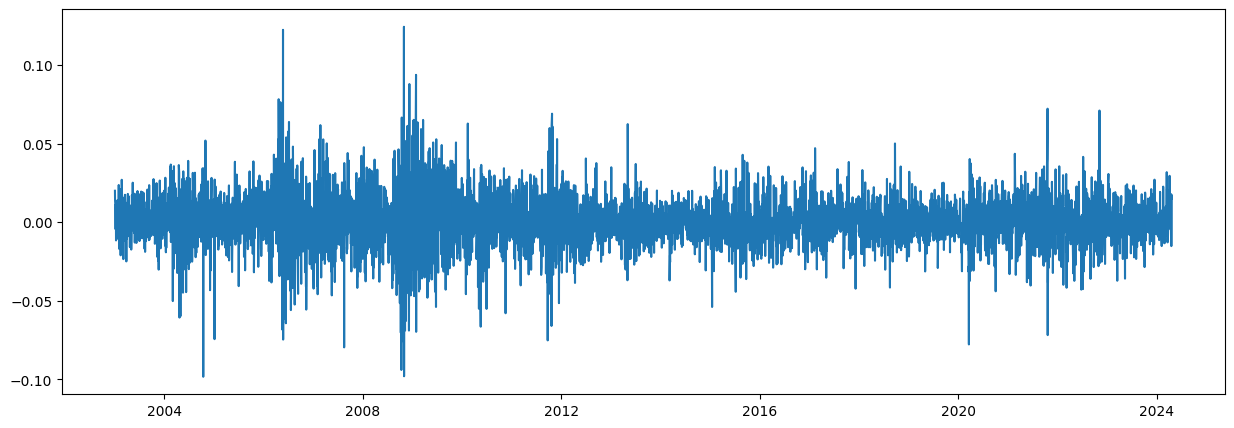

In [9]:
# plot LMCADY vs Time
plt.plot(df2['LMCADY'])
# widen the plot
plt.gcf().set_size_inches(15, 5)

In [10]:
df3 = df.copy()

# convertir cada columna a retornos logarítmicos [(ln(Pt/Pt-1))], excepto la columna de fecha
for i in df3.columns:
    df3[i] = np.log(df3[i] / df3[i].shift(1))

# eliminar filas con valores NaN resultantes del cambio
df3.dropna(inplace=True)

df3

/home/fochoa/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LMCADS03,LMCADY,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG
Date,,,,,,,,,,
2003-01-02,0.019048,0.019834,0.010739,0.000000,0.032661,0.025337,0.023209,0.020619,-0.005763,0.007918
2003-01-03,0.013121,0.013478,-0.004965,0.000068,-0.000484,0.014288,0.003782,0.037891,0.014915,0.014833
2003-01-06,0.010804,0.010262,-0.004891,0.000225,0.022226,-0.016118,0.018549,-0.030073,0.000000,0.001533
2003-01-07,-0.004616,-0.004479,0.005867,0.000000,-0.006566,-0.002697,-0.008853,-0.032292,-0.011453,-0.020109
2003-01-08,0.009822,0.009771,-0.006848,-0.000381,-0.014186,0.004093,-0.014657,-0.016873,0.018206,0.010363
...,...,...,...,...,...,...,...,...,...,...
2024-04-15,0.012452,0.017658,0.001602,-0.010086,-0.012094,-0.001092,-0.010055,-0.002923,0.016486,0.035060
2024-04-16,-0.011342,-0.015314,0.000471,-0.018883,-0.002059,0.000209,-0.007654,-0.000586,-0.000189,-0.026854
2024-04-17,0.012021,0.014285,-0.002922,-0.013186,-0.005797,-0.005945,-0.004116,-0.031779,-0.009220,0.004129


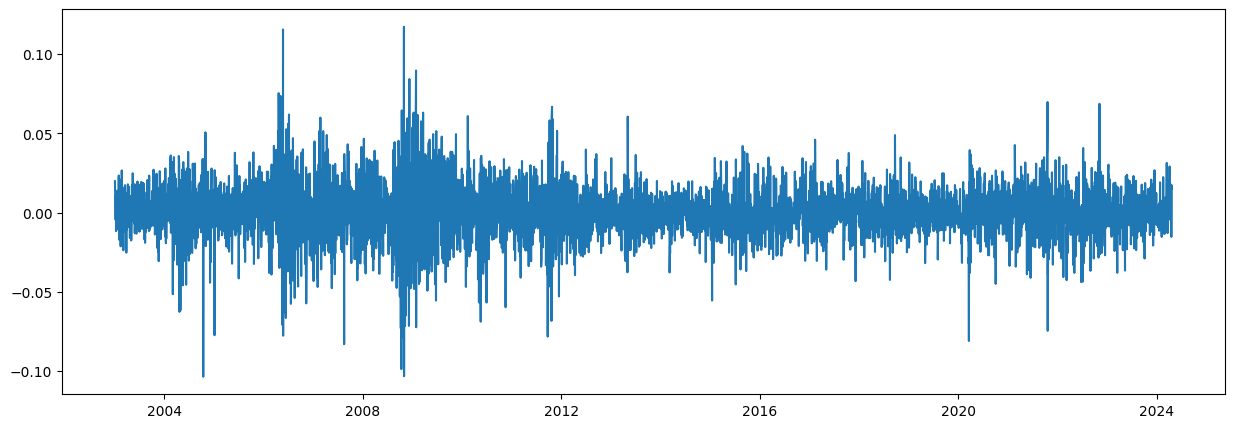

In [11]:
# plot LMCADY vs Time
plt.plot(df3['LMCADY'])

# widen the plot
plt.gcf().set_size_inches(15, 5)

In [12]:
df.to_csv('./out/data_clean_raw.csv', index=False)

In [13]:
df2.to_csv('./out/data_clean_return.csv', index=False)
df2

,LMCADS03,LMCADY,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG
Date,,,,,,,,,,
2003-01-02,0.019231,0.020032,0.010797,0.000000,0.033200,0.025661,0.023480,0.020833,-0.005746,0.007950
2003-01-03,0.013208,0.013569,-0.004952,0.000068,-0.000484,0.014390,0.003789,0.038619,0.015027,0.014944
2003-01-06,0.010863,0.010315,-0.004879,0.000225,0.022474,-0.015988,0.018723,-0.029625,0.000000,0.001534
2003-01-07,-0.004605,-0.004469,0.005884,0.000000,-0.006545,-0.002694,-0.008814,-0.031776,-0.011388,-0.019908
2003-01-08,0.009870,0.009819,-0.006825,-0.000381,-0.014086,0.004101,-0.014551,-0.016731,0.018373,0.010417
...,...,...,...,...,...,...,...,...,...,...
2024-04-15,0.012530,0.017815,0.001603,-0.010035,-0.012021,-0.001091,-0.010004,-0.002919,0.016623,0.035681
2024-04-16,-0.011278,-0.015198,0.000471,-0.018706,-0.002057,0.000209,-0.007625,-0.000585,-0.000189,-0.026496
2024-04-17,0.012093,0.014388,-0.002917,-0.013099,-0.005781,-0.005927,-0.004108,-0.031279,-0.009178,0.004138


In [14]:
df3.to_csv('./out/data_clean_log_return.csv', index=False)
df3

,LMCADS03,LMCADY,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG
Date,,,,,,,,,,
2003-01-02,0.019048,0.019834,0.010739,0.000000,0.032661,0.025337,0.023209,0.020619,-0.005763,0.007918
2003-01-03,0.013121,0.013478,-0.004965,0.000068,-0.000484,0.014288,0.003782,0.037891,0.014915,0.014833
2003-01-06,0.010804,0.010262,-0.004891,0.000225,0.022226,-0.016118,0.018549,-0.030073,0.000000,0.001533
2003-01-07,-0.004616,-0.004479,0.005867,0.000000,-0.006566,-0.002697,-0.008853,-0.032292,-0.011453,-0.020109
2003-01-08,0.009822,0.009771,-0.006848,-0.000381,-0.014186,0.004093,-0.014657,-0.016873,0.018206,0.010363
...,...,...,...,...,...,...,...,...,...,...
2024-04-15,0.012452,0.017658,0.001602,-0.010086,-0.012094,-0.001092,-0.010055,-0.002923,0.016486,0.035060
2024-04-16,-0.011342,-0.015314,0.000471,-0.018883,-0.002059,0.000209,-0.007654,-0.000586,-0.000189,-0.026854
2024-04-17,0.012021,0.014285,-0.002922,-0.013186,-0.005797,-0.005945,-0.004116,-0.031779,-0.009220,0.004129


In [15]:
df_test = df2.select_dtypes(include=['number'])

# Ahora calcular el resumen estadístico solo para datos numéricos
summary = df_test.describe().T

# Calcular kurtosis y asimetría solo para las columnas numéricas
summary['kurtosis'] = df_test.kurtosis()
summary['skew'] = df_test.skew()

# aplicar jarque_bera solo a las columnas numéricas
jarque_bera_results = {col: jarque_bera(df_test[col].dropna()) for col in df_test}

# Crear un DataFrame con los resultados del test de Jarque-Bera
jb_summary = pd.DataFrame(
    {col: {'Jarque Bera': result[0]} for col, result in jarque_bera_results.items()}
).T

summary = summary.join(jb_summary)
summary


,count,mean,std,min,25%,50%,75%,max,kurtosis,skew,Jarque Bera
LMCADS03,5557.0,0.000460,0.016017,-0.098777,-0.007461,0.000000,0.008787,0.126150,4.507469,0.001125,4.693587e+03
LMCADY,5557.0,0.000468,0.016424,-0.098396,-0.007673,0.000000,0.008991,0.124411,4.341246,0.009973,4.353807e+03
DXY,5557.0,0.000019,0.004788,-0.026894,-0.002644,0.000000,0.002652,0.025519,1.852841,-0.032291,7.934981e+02
COMXCOPR,5557.0,-0.000169,0.029553,-0.414284,-0.005132,0.000000,0.001889,1.567079,1467.860363,28.991161,4.987631e+08
SPX,5557.0,0.000380,0.011720,-0.119841,-0.003953,0.000374,0.005488,0.115800,13.197368,-0.246270,4.030476e+04
BCOM,5557.0,0.000040,0.010205,-0.062017,-0.005334,0.000000,0.005591,0.058100,2.862511,-0.244878,1.947912e+03
MXWD,5557.0,0.000293,0.009806,-0.095133,-0.003802,0.000640,0.004892,0.093101,11.965252,-0.509336,3.332374e+04
CL1,5557.0,-0.000162,0.051411,-3.059661,-0.011749,0.000213,0.012678,0.376623,2324.584944,-40.512466,1.250449e+09
XAU,5557.0,0.000404,0.010687,-0.090737,-0.004876,0.000514,0.006038,0.107883,5.917566,-0.233936,8.141153e+03
XAG,5557.0,0.000509,0.019197,-0.184416,-0.008005,0.000792,0.009900,0.140882,7.984418,-0.781807,1.529625e+04


In [16]:
# invertir filas y columnas
summary = summary.T
summary

,LMCADS03,LMCADY,DXY,COMXCOPR,SPX,BCOM,MXWD,CL1,XAU,XAG
count,5557.000000,5557.000000,5557.000000,5.557000e+03,5557.000000,5557.000000,5557.000000,5.557000e+03,5557.000000,5557.000000
mean,0.000460,0.000468,0.000019,-1.687665e-04,0.000380,0.000040,0.000293,-1.618562e-04,0.000404,0.000509
std,0.016017,0.016424,0.004788,2.955338e-02,0.011720,0.010205,0.009806,5.141133e-02,0.010687,0.019197
min,-0.098777,-0.098396,-0.026894,-4.142837e-01,-0.119841,-0.062017,-0.095133,-3.059661e+00,-0.090737,-0.184416
25%,-0.007461,-0.007673,-0.002644,-5.131924e-03,-0.003953,-0.005334,-0.003802,-1.174900e-02,-0.004876,-0.008005
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000374,0.000000,0.000640,2.130833e-04,0.000514,0.000792
75%,0.008787,0.008991,0.002652,1.888950e-03,0.005488,0.005591,0.004892,1.267829e-02,0.006038,0.009900
max,0.126150,0.124411,0.025519,1.567079e+00,0.115800,0.058100,0.093101,3.766234e-01,0.107883,0.140882
kurtosis,4.507469,4.341246,1.852841,1.467860e+03,13.197368,2.862511,11.965252,2.324585e+03,5.917566,7.984418
skew,0.001125,0.009973,-0.032291,2.899116e+01,-0.246270,-0.244878,-0.509336,-4.051247e+01,-0.233936,-0.781807


In [17]:
# save summary to csv
summary.to_csv('./out/summary_return.csv', index=True)

In [18]:
# Crear DataFrames separados para cada conjunto de periodos
df_5d = df2.copy()
df_10d = df2.copy()
df_20d = df2.copy()

# Cálculo de retornos acumulados y desviación estándar para cada DataFrame

# Para 5 días
df_5d['LMCADY_acu_5d'] = df_5d['LMCADY'].rolling(window=5).sum().shift(-5)
df_5d['LMCADY_std_5d'] = df_5d['LMCADY'].rolling(window=5).std().shift(-5)

# Para 10 días
df_10d['LMCADY_acu_10d'] = df_10d['LMCADY'].rolling(window=10).sum().shift(-10)
df_10d['LMCADY_std_10d'] = df_10d['LMCADY'].rolling(window=10).std().shift(-10)

# Para 20 días
df_20d['LMCADY_acu_20d'] = df_20d['LMCADY'].rolling(window=20).sum().shift(-20)
df_20d['LMCADY_std_20d'] = df_20d['LMCADY'].rolling(window=20).std().shift(-20)

# Verificación de los resultados
print(df_5d)
print(df_10d)
print(df_20d)


            LMCADS03    LMCADY       DXY  COMXCOPR       SPX      BCOM  \
Date                                                                     
2003-01-02  0.019231  0.020032  0.010797  0.000000  0.033200  0.025661   
2003-01-03  0.013208  0.013569 -0.004952  0.000068 -0.000484  0.014390   
2003-01-06  0.010863  0.010315 -0.004879  0.000225  0.022474 -0.015988   
2003-01-07 -0.004605 -0.004469  0.005884  0.000000 -0.006545 -0.002694   
2003-01-08  0.009870  0.009819 -0.006825 -0.000381 -0.014086  0.004101   
...              ...       ...       ...       ...       ...       ...   
2024-04-15  0.012530  0.017815  0.001603 -0.010035 -0.012021 -0.001091   
2024-04-16 -0.011278 -0.015198  0.000471 -0.018706 -0.002057  0.000209   
2024-04-17  0.012093  0.014388 -0.002917 -0.013099 -0.005781 -0.005927   
2024-04-18  0.015862  0.017103  0.001888 -0.019604 -0.002208 -0.001273   
2024-04-19  0.014536  0.015048  0.000000 -0.016363 -0.008759  0.009412   

                MXWD       CL1       

In [19]:
df_5d_log = df3.copy()
df_10d_log = df3.copy()
df_20d_log = df3.copy()

# Cálculo de retornos acumulados y desviación estándar para cada DataFrame

# Para 5 días
df_5d_log['LMCADY_acu_5d_log'] = df_5d_log['LMCADY'].rolling(window=5).sum().shift(-5)
df_5d_log['LMCADY_std_5d_log'] = df_5d_log['LMCADY'].rolling(window=5).std().shift(-5)

# Para 10 días
df_10d_log['LMCADY_acu_10d_log'] = df_10d_log['LMCADY'].rolling(window=10).sum().shift(-10)
df_10d_log['LMCADY_std_10d_log'] = df_10d_log['LMCADY'].rolling(window=10).std().shift(-10)

# Para 20 días
df_20d_log['LMCADY_acu_20d_log'] = df_20d_log['LMCADY'].rolling(window=20).sum().shift(-20)
df_20d_log['LMCADY_std_20d_log'] = df_20d_log['LMCADY'].rolling(window=20).std().shift(-20)

In [20]:
df_5d_clean  = df_5d .dropna()
df_10d_clean = df_10d.dropna()
df_20d_clean = df_20d.dropna()

df_5d_clean. to_csv('./out/copper_returns_5d.csv' , index=True)
df_10d_clean.to_csv('./out/copper_returns_10d.csv', index=True)
df_20d_clean.to_csv('./out/copper_returns_20d.csv', index=True)

In [21]:
df_5d_log_clean  = df_5d_log .dropna()
df_10d_log_clean = df_10d_log.dropna()
df_20d_log_clean = df_20d_log.dropna()

df_5d_log_clean. to_csv('./out/copper_log_returns_5d.csv' , index=True)
df_10d_log_clean.to_csv('./out/copper_log_returns_10d.csv', index=True)
df_20d_log_clean.to_csv('./out/copper_log_returns_20d.csv', index=True)